### 펭귄 데이터로 실습
- 펭귄 데이터 호출

In [14]:
pangsu = pd.read_csv('penguins_raw.csv')
pangsu

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


Island 특징에 어디 섬에서 발견되었는지 확인

In [15]:
pangsu['Island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: Island, dtype: int64

Region 특징에 어느 지역들이 들어 있는지 확인 
- 한 지역만 들어있어 분류하는 데 쓸모가 없다.


In [16]:
pangsu['Region'].value_counts()

Anvers    344
Name: Region, dtype: int64

정답 데이터 종류 확인

In [17]:
pangsu["Species"].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

결손값 확인
- Culmen과 Flipper가 결손되어 있는 행은 동일, 그 행은 버린다. 
- Sex, Delta 15 N, Delta 13 C은 피벗 테이블로 결손값을 채워줄 수 있지만 이번에는 생략한다.

In [18]:
pangsu.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               290
dtype: int64

Island 더미화
- 더미화를 한 뒤에 데이터에 붙여준다.

In [20]:
dum=pd.get_dummies(pangsu['Island'],drop_first = True)
dum

,Dream,Torgersen
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
339,1,0
340,1,0
341,1,0
342,1,0


In [21]:
df1 = pd.concat([pangsu,dum],axis=1)
df1

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Dream,Torgersen
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.,0,1
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN,0,1
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN,0,1
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.,0,1
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN,1,0
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.,1,0
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.,1,0
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN,1,0


사용할 특징 추출
- 사용할 특징들을 추출해서 데이터셋을 만든다.

In [20]:
col=["Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)","Body Mass (g)","Dream","Torgersen","Species"]
tmp=df1[col]
tmp.columns=["CL","CD","FL","BM","D","T","S"]
tmp

,CL,CD,FL,BM,D,T,S
0,39.1,18.7,181.0,3750.0,0,1,Adelie Penguin (Pygoscelis adeliae)
1,39.5,17.4,186.0,3800.0,0,1,Adelie Penguin (Pygoscelis adeliae)
2,40.3,18.0,195.0,3250.0,0,1,Adelie Penguin (Pygoscelis adeliae)
3,NaN,NaN,NaN,NaN,0,1,Adelie Penguin (Pygoscelis adeliae)
4,36.7,19.3,193.0,3450.0,0,1,Adelie Penguin (Pygoscelis adeliae)
...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,1,0,Chinstrap penguin (Pygoscelis antarctica)
340,43.5,18.1,202.0,3400.0,1,0,Chinstrap penguin (Pygoscelis antarctica)
341,49.6,18.2,193.0,3775.0,1,0,Chinstrap penguin (Pygoscelis antarctica)
342,50.8,19.0,210.0,4100.0,1,0,Chinstrap penguin (Pygoscelis antarctica)


산포도
- "Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)","Body Mass (g)"의 산포도

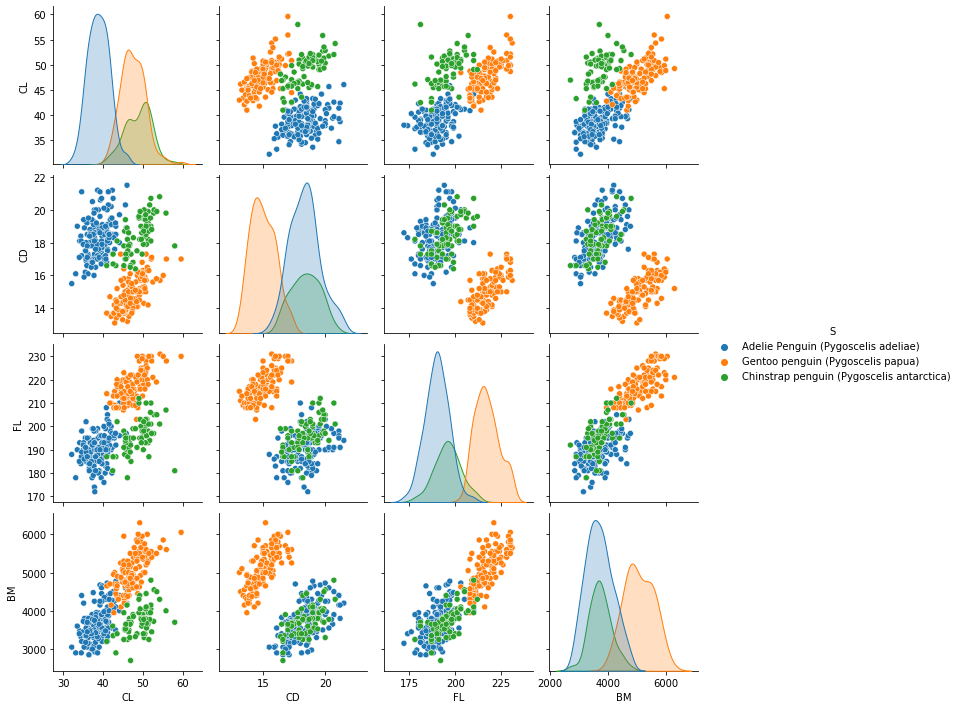

In [21]:
import seaborn as sns

sns.pairplot(vars=["CL","CD","FL","BM"], 
             data=tmp, hue='S')

결손값 제거
- 빠져있는 2개의 결손값을 제거한다.

In [22]:
df2 = tmp.dropna()
df2

,CL,CD,FL,BM,D,T,S
0,39.1,18.7,181.0,3750.0,0,1,Adelie Penguin (Pygoscelis adeliae)
1,39.5,17.4,186.0,3800.0,0,1,Adelie Penguin (Pygoscelis adeliae)
2,40.3,18.0,195.0,3250.0,0,1,Adelie Penguin (Pygoscelis adeliae)
4,36.7,19.3,193.0,3450.0,0,1,Adelie Penguin (Pygoscelis adeliae)
5,39.3,20.6,190.0,3650.0,0,1,Adelie Penguin (Pygoscelis adeliae)
...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,1,0,Chinstrap penguin (Pygoscelis antarctica)
340,43.5,18.1,202.0,3400.0,1,0,Chinstrap penguin (Pygoscelis antarctica)
341,49.6,18.2,193.0,3775.0,1,0,Chinstrap penguin (Pygoscelis antarctica)
342,50.8,19.0,210.0,4100.0,1,0,Chinstrap penguin (Pygoscelis antarctica)


특징과 타겟으로 나눈다.
- 이번에 사용할 특징은 [CL,CD,FL,BM]

In [23]:
X=df2.iloc[:,:-3]
X

,CL,CD,FL,BM
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0


In [24]:
y=df2["S"]
y

0            Adelie Penguin (Pygoscelis adeliae)
1            Adelie Penguin (Pygoscelis adeliae)
2            Adelie Penguin (Pygoscelis adeliae)
4            Adelie Penguin (Pygoscelis adeliae)
5            Adelie Penguin (Pygoscelis adeliae)
                         ...                    
339    Chinstrap penguin (Pygoscelis antarctica)
340    Chinstrap penguin (Pygoscelis antarctica)
341    Chinstrap penguin (Pygoscelis antarctica)
342    Chinstrap penguin (Pygoscelis antarctica)
343    Chinstrap penguin (Pygoscelis antarctica)
Name: S, Length: 342, dtype: object

위에 Naive Bayes와 Logistic Regression의 데이터 개수에 따른 정확도를 그려주는 함수

In [25]:
def draw_plt(X,y):
    X_tn, X_te, y_tn, y_te = train_test_split(X,y,random_state = 0,stratify = y)
    print(X_tn.shape)
    print(pd.DataFrame(X_tn))

    # 데이터 표준화
    std_scale = StandardScaler()
    std_scale.fit(X_tn)
    X_tn_std = std_scale.transform(X_tn)
    X_te_std = std_scale.transform(X_te)

    # 선형 회귀 학습
    lr = LogisticRegression()
    nb = GaussianNB()

    # 나이브 베이즈 학습
    clf_gnb = GaussianNB()
    clf_gnb.fit(X_tn_std,y_tn)

    lr_scores = []
    nb_scores = []

    train_sizes = range(10,len(X_tn),25)

    for train_size in train_sizes:
        X_sl, _, y_sl,_=train_test_split(X_tn,y_tn,train_size = train_size,stratify = y_tn, random_state=0)
        nb.fit(X_sl,y_sl)
        nb_scores.append(nb.score(X_te,y_te))
        lr.fit(X_sl,y_sl)
        lr_scores.append(lr.score(X_te,y_te))

    plt.plot(train_sizes, nb_scores, label = 'Naive Bayes')
    plt.plot(train_sizes, lr_scores, linestyle ='--',label = 'Logistic Regression')
    plt.title("NB and LR")
    plt.xlabel('Number of training instances')
    plt.ylabel("Test set accuracy")
    plt.legend()

(256, 4)
       CL    CD     FL      BM
23   38.2  18.1  185.0  3950.0
174  46.5  14.5  213.0  4400.0
206  46.5  14.4  217.0  4900.0
323  49.0  19.6  212.0  4300.0
17   42.5  20.7  197.0  4500.0
..    ...   ...    ...     ...
220  43.5  14.2  220.0  4700.0
122  40.2  17.0  176.0  3450.0
94   36.2  17.3  187.0  3300.0
246  44.5  14.7  214.0  4850.0
64   36.4  17.1  184.0  2850.0

[256 rows x 4 columns]


/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

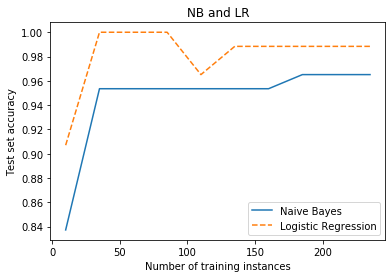

In [26]:
draw_plt(X,y)

In [27]:
X=df2.iloc[:,:-1]
X

,CL,CD,FL,BM,D,T
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,0,1
2,40.3,18.0,195.0,3250.0,0,1
4,36.7,19.3,193.0,3450.0,0,1
5,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,1,0
340,43.5,18.1,202.0,3400.0,1,0
341,49.6,18.2,193.0,3775.0,1,0
342,50.8,19.0,210.0,4100.0,1,0


(256, 6)
       CL    CD     FL      BM  D  T
23   38.2  18.1  185.0  3950.0  0  0
174  46.5  14.5  213.0  4400.0  0  0
206  46.5  14.4  217.0  4900.0  0  0
323  49.0  19.6  212.0  4300.0  1  0
17   42.5  20.7  197.0  4500.0  0  1
..    ...   ...    ...     ... .. ..
220  43.5  14.2  220.0  4700.0  0  0
122  40.2  17.0  176.0  3450.0  0  1
94   36.2  17.3  187.0  3300.0  1  0
246  44.5  14.7  214.0  4850.0  0  0
64   36.4  17.1  184.0  2850.0  0  0

[256 rows x 6 columns]


/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

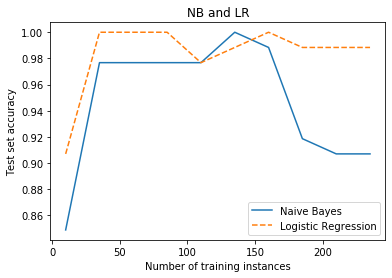

In [28]:
draw_plt(X,y)

In [29]:
X=df2.iloc[:,:-4]
X

,CL,CD,FL
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
4,36.7,19.3,193.0
5,39.3,20.6,190.0
...,...,...,...
339,55.8,19.8,207.0
340,43.5,18.1,202.0
341,49.6,18.2,193.0
342,50.8,19.0,210.0


/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

(256, 3)
       CL    CD     FL
23   38.2  18.1  185.0
174  46.5  14.5  213.0
206  46.5  14.4  217.0
323  49.0  19.6  212.0
17   42.5  20.7  197.0
..    ...   ...    ...
220  43.5  14.2  220.0
122  40.2  17.0  176.0
94   36.2  17.3  187.0
246  44.5  14.7  214.0
64   36.4  17.1  184.0

[256 rows x 3 columns]


/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

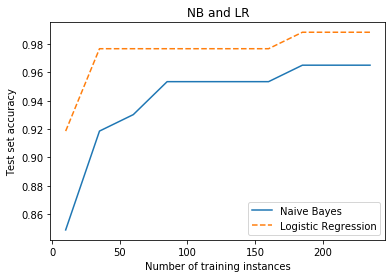

In [30]:
draw_plt(X,y)

In [31]:
X=df2.iloc[:,[0,0,1,2,2,3]]
X

,CL,CL,CD,FL,FL,BM
0,39.1,39.1,18.7,181.0,181.0,3750.0
1,39.5,39.5,17.4,186.0,186.0,3800.0
2,40.3,40.3,18.0,195.0,195.0,3250.0
4,36.7,36.7,19.3,193.0,193.0,3450.0
5,39.3,39.3,20.6,190.0,190.0,3650.0
...,...,...,...,...,...,...
339,55.8,55.8,19.8,207.0,207.0,4000.0
340,43.5,43.5,18.1,202.0,202.0,3400.0
341,49.6,49.6,18.2,193.0,193.0,3775.0
342,50.8,50.8,19.0,210.0,210.0,4100.0


/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

(256, 6)
       CL    CL    CD     FL     FL      BM
23   38.2  38.2  18.1  185.0  185.0  3950.0
174  46.5  46.5  14.5  213.0  213.0  4400.0
206  46.5  46.5  14.4  217.0  217.0  4900.0
323  49.0  49.0  19.6  212.0  212.0  4300.0
17   42.5  42.5  20.7  197.0  197.0  4500.0
..    ...   ...   ...    ...    ...     ...
220  43.5  43.5  14.2  220.0  220.0  4700.0
122  40.2  40.2  17.0  176.0  176.0  3450.0
94   36.2  36.2  17.3  187.0  187.0  3300.0
246  44.5  44.5  14.7  214.0  214.0  4850.0
64   36.4  36.4  17.1  184.0  184.0  2850.0

[256 rows x 6 columns]


/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

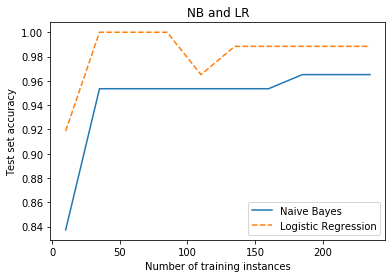

In [32]:
draw_plt(X,y)

In [33]:
X=df2.iloc[:,[0,1,2,3]]
temp=df2.iloc[:,[0,2]]
temp.columns=["CL^2","FL^2"]
X=pd.concat([X,temp],axis=1)
X

,CL,CD,FL,BM,CL^2,FL^2
0,39.1,18.7,181.0,3750.0,39.1,181.0
1,39.5,17.4,186.0,3800.0,39.5,186.0
2,40.3,18.0,195.0,3250.0,40.3,195.0
4,36.7,19.3,193.0,3450.0,36.7,193.0
5,39.3,20.6,190.0,3650.0,39.3,190.0
...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,55.8,207.0
340,43.5,18.1,202.0,3400.0,43.5,202.0
341,49.6,18.2,193.0,3775.0,49.6,193.0
342,50.8,19.0,210.0,4100.0,50.8,210.0


/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

(256, 6)
       CL    CD     FL      BM  CL^2   FL^2
23   38.2  18.1  185.0  3950.0  38.2  185.0
174  46.5  14.5  213.0  4400.0  46.5  213.0
206  46.5  14.4  217.0  4900.0  46.5  217.0
323  49.0  19.6  212.0  4300.0  49.0  212.0
17   42.5  20.7  197.0  4500.0  42.5  197.0
..    ...   ...    ...     ...   ...    ...
220  43.5  14.2  220.0  4700.0  43.5  220.0
122  40.2  17.0  176.0  3450.0  40.2  176.0
94   36.2  17.3  187.0  3300.0  36.2  187.0
246  44.5  14.7  214.0  4850.0  44.5  214.0
64   36.4  17.1  184.0  2850.0  36.4  184.0

[256 rows x 6 columns]


/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

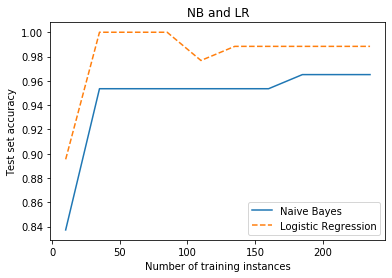

In [34]:
draw_plt(X,y)

In [35]:
# X=df2.iloc[:,[0,1,2,3]]
temp=(df2.iloc[:,0]**2)*(df2.iloc[:,2]**2)

X=pd.concat([temp],axis=1)
# X=temp
X.columns=["CL^2*FL^2"]

X

,CL^2*FL^2
0,5.008534e+07
1,5.397841e+07
2,6.175602e+07
4,5.017031e+07
5,5.575609e+07
...,...
339,1.334164e+08
340,7.721137e+07
341,9.163850e+07
342,1.138062e+08


(256, 1)
        CL^2*FL^2
23   4.994249e+07
174  9.809912e+07
206  1.018182e+08
323  1.079105e+08
17   7.009876e+07
..            ...
220  9.158490e+07
122  5.005846e+07
94   4.582478e+07
246  9.068753e+07
64   4.485785e+07

[256 rows x 1 columns]


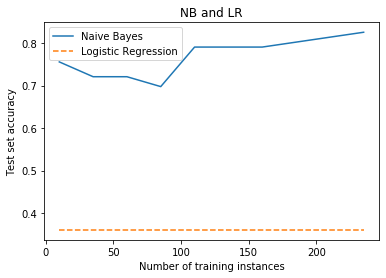

In [36]:
draw_plt(X,y)

In [37]:
X=df2.iloc[:,[0,1,2]]
temp=(df2.iloc[:,0])*2
X=pd.concat([X,temp],axis=1)
X.columns=X.columns+["CL^2"]
X

,CLCL^2,CDCL^2,FLCL^2,CLCL^2
0,39.1,18.7,181.0,78.2
1,39.5,17.4,186.0,79.0
2,40.3,18.0,195.0,80.6
4,36.7,19.3,193.0,73.4
5,39.3,20.6,190.0,78.6
...,...,...,...,...
339,55.8,19.8,207.0,111.6
340,43.5,18.1,202.0,87.0
341,49.6,18.2,193.0,99.2
342,50.8,19.0,210.0,101.6


(256, 4)
     CLCL^2  CDCL^2  FLCL^2  CLCL^2
23     38.2    18.1   185.0    76.4
174    46.5    14.5   213.0    93.0
206    46.5    14.4   217.0    93.0
323    49.0    19.6   212.0    98.0
17     42.5    20.7   197.0    85.0
..      ...     ...     ...     ...
220    43.5    14.2   220.0    87.0
122    40.2    17.0   176.0    80.4
94     36.2    17.3   187.0    72.4
246    44.5    14.7   214.0    89.0
64     36.4    17.1   184.0    72.8

[256 rows x 4 columns]


/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

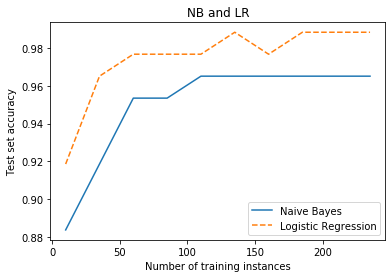

In [38]:
draw_plt(X,y)

In [43]:
list(X.columns)

['CL', 'CD', 'FL', 'BM', 0]

In [44]:
X=df2.iloc[:,[0,1,2,3]]
temp=(df2.iloc[:,0]**2)*(df2.iloc[:,2]**2)
X=pd.concat([X,temp],axis=1)
X.columns=list(X.columns)[:-1]+["CL^2*FL^2"]

X

,CL,CD,FL,BM,CL^2*FL^2
0,39.1,18.7,181.0,3750.0,5.008534e+07
1,39.5,17.4,186.0,3800.0,5.397841e+07
2,40.3,18.0,195.0,3250.0,6.175602e+07
4,36.7,19.3,193.0,3450.0,5.017031e+07
5,39.3,20.6,190.0,3650.0,5.575609e+07
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,1.334164e+08
340,43.5,18.1,202.0,3400.0,7.721137e+07
341,49.6,18.2,193.0,3775.0,9.163850e+07
342,50.8,19.0,210.0,4100.0,1.138062e+08


(256, 5)
       CL    CD     FL      BM     CL^2*FL^2
23   38.2  18.1  185.0  3950.0  4.994249e+07
174  46.5  14.5  213.0  4400.0  9.809912e+07
206  46.5  14.4  217.0  4900.0  1.018182e+08
323  49.0  19.6  212.0  4300.0  1.079105e+08
17   42.5  20.7  197.0  4500.0  7.009876e+07
..    ...   ...    ...     ...           ...
220  43.5  14.2  220.0  4700.0  9.158490e+07
122  40.2  17.0  176.0  3450.0  5.005846e+07
94   36.2  17.3  187.0  3300.0  4.582478e+07
246  44.5  14.7  214.0  4850.0  9.068753e+07
64   36.4  17.1  184.0  2850.0  4.485785e+07

[256 rows x 5 columns]


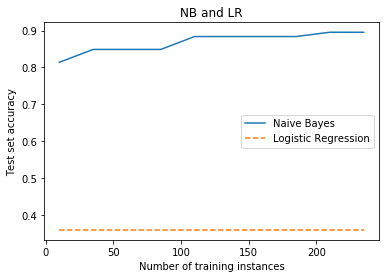

In [45]:
draw_plt(X,y)

In [47]:
X=df2.iloc[:,[0,1,2,3]]
temp=(df2.iloc[:,0])*(df2.iloc[:,2])
X=pd.concat([X,temp],axis=1)
X.columns=list(X.columns)[:-1]+["CL*FL"]
X

,CL,CD,FL,BM,CL*FL
0,39.1,18.7,181.0,3750.0,7077.1
1,39.5,17.4,186.0,3800.0,7347.0
2,40.3,18.0,195.0,3250.0,7858.5
4,36.7,19.3,193.0,3450.0,7083.1
5,39.3,20.6,190.0,3650.0,7467.0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,11550.6
340,43.5,18.1,202.0,3400.0,8787.0
341,49.6,18.2,193.0,3775.0,9572.8
342,50.8,19.0,210.0,4100.0,10668.0


(256, 5)
       CL    CD     FL      BM    CL*FL
23   38.2  18.1  185.0  3950.0   7067.0
174  46.5  14.5  213.0  4400.0   9904.5
206  46.5  14.4  217.0  4900.0  10090.5
323  49.0  19.6  212.0  4300.0  10388.0
17   42.5  20.7  197.0  4500.0   8372.5
..    ...   ...    ...     ...      ...
220  43.5  14.2  220.0  4700.0   9570.0
122  40.2  17.0  176.0  3450.0   7075.2
94   36.2  17.3  187.0  3300.0   6769.4
246  44.5  14.7  214.0  4850.0   9523.0
64   36.4  17.1  184.0  2850.0   6697.6

[256 rows x 5 columns]


/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/labuser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

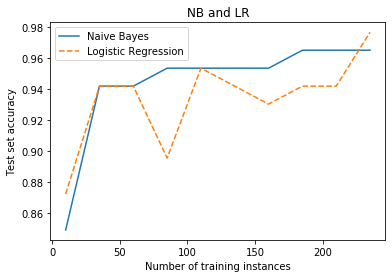

In [48]:
draw_plt(X,y)

In [16]:
import pandas as pd
sms=pd.read_csv('sms_spam.csv', encoding = 'UTF-8', sep = ',')
sms

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 878: invalid start byte